In [ ]:
import numpy as np
import pandas as pd

In [ ]:
y = pd.read_excel('/content/ex8_movies.xlsx', sheet_name = 'y', header=None)
y.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,5,4,0,0,4,4,0,0,0,4,...,2,3,4,0,4,0,0,5,0,0
1,3,0,0,0,3,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,5
2,4,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
3,3,0,0,0,0,0,5,0,0,4,...,5,0,0,0,0,0,2,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
r = pd.read_excel('./ex8_movies.xlsx', sheet_name='R', header=None)
r.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,True,True,False,False,True,True,False,False,False,True,...,True,True,True,False,True,False,False,True,False,False
1,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = pd.read_excel('./movie_params.xlsx', sheet_name='X', header=None)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,1.048686,-0.400232,1.194119,0.371128,0.407607,0.974407,-0.058410,0.861721,-0.697290,0.288746
1,0.780851,-0.385626,0.521198,0.227355,0.570109,0.641264,-0.550006,0.704021,-0.485835,-0.564624
2,0.641509,-0.547854,-0.083796,-0.598519,-0.017694,0.299736,-0.720807,0.838546,-0.694832,-1.134796
3,0.453618,-0.800218,0.680481,-0.081743,0.136601,0.907561,0.277682,0.369300,-1.261208,-0.235581
4,0.937538,0.106090,0.361953,0.086646,0.287505,0.518644,-0.056871,0.914573,-0.819334,-0.542847


In [ ]:
theta = pd.read_excel('./movie_params.xlsx', sheet_name='theta', header=None)
theta.head()

,0,1,2,3,4,5,6,7,8,9
0,0.285444,-1.684265,0.262939,-0.287317,0.585725,0.980188,-0.063375,0.767232,-1.104602,-0.251867
1,0.505013,-0.454648,0.317462,-0.115087,0.567704,0.818905,0.461649,1.093063,-1.200294,-0.391617
2,-0.431917,-0.478804,0.846711,-0.011731,-0.138578,0.742591,-0.440276,1.363340,-0.325235,-0.194682
3,0.728598,-0.271894,0.326844,-0.250724,-0.471017,1.215827,-0.106129,1.615801,-0.670805,0.129868
4,0.052119,-1.380697,0.637941,-0.231980,0.246337,1.438879,-0.860022,0.668077,-0.560330,0.414959


In [ ]:
for i in range(len(r.columns)):
    r[i] = r[i].replace({True: 1, False: 0})

In [ ]:
r.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,1,1,0,0,1,1,0,0,0,1,...,1,1,1,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.shape

(1682, 943)

In [ ]:
X.shape

(1682, 10)

In [ ]:
theta.shape

(943, 10)

In [ ]:
r.shape

(1682, 943)

In [ ]:
movies = open('./movie_ids.txt', 'r', encoding='utf-8', errors='ignore').read().split("\n")[:-1]
movies

In [ ]:
def costfunction(X, y, r, theta, Lambda):
    predictions = np.dot(X, theta.T)
    err = predictions-y
    J = 1/2 * np.sum((err**2) * r)
    reg_x = Lambda/2 * np.sum(np.sum(theta**2))
    reg_theta = Lambda/2 * np.sum(np.sum(X**2))
    grad = J + reg_x + reg_theta
    return J, grad

In [ ]:
J, grad = costfunction(X, y, r, theta, 0)

In [ ]:
m, n = y.shape[0], y.shape[1]

In [ ]:
ymean = np.zeros((m, 1))
ymean

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
ynorm = np.zeros((m, n))

In [ ]:
ymean[7]

array([0.])

In [ ]:
ynorm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
a = pd.DataFrame([[3,4,5], [7,3,5], [7,4,6], [1,2,3]])
a

,0,1,2
0,3,4,5
1,7,3,5
2,7,4,6
3,1,2,3


In [ ]:
np.sum(a, axis=1)

0    12
1    15
2    17
3     6
dtype: int64

In [ ]:
np.sum(y, axis=1)

0       1753
1        420
2        273
3        742
4        284
        ... 
1677       1
1678       3
1679       2
1680       3
1681       3
Length: 1682, dtype: int64

In [ ]:
ymean = np.sum(y, axis=1)/np.sum(r, axis=1)

In [ ]:
ynorm = np.sum(y, axis=1)*np.sum(r, axis=1) - ymean

In [ ]:
def normalizeRatings(y, r):
    ymean = np.sum(y, axis=1)/np.sum(r, axis=1)
    ynorm = np.sum(y, axis=1)*np.sum(r, axis=1) - ymean
    return ymean, ynorm

In [ ]:
np.sum(y, axis=1)/np.sum(r, axis=1)

0       3.878319
1       3.206107
2       3.033333
3       3.550239
4       3.302326
          ...   
1677    1.000000
1678    3.000000
1679    2.000000
1680    3.000000
1681    3.000000
Length: 1682, dtype: float64

In [ ]:
np.sum(y, axis=1)*np.sum(r, axis=1) - ymean

0       792352.121681
1        55016.793893
2        24566.966667
3       155074.449761
4        24420.697674
            ...      
1677         0.000000
1678         0.000000
1679         0.000000
1680         0.000000
1681         0.000000
Length: 1682, dtype: float64

In [ ]:
def gradientDescent(X, y, r, theta, Lambda, num_iter, alpha):
    J_hist = []
    for i in range(num_iter):
        cost, grad = costfunction(X, y, r, theta, Lambda)
        X = X -  alpha*(np.dot(np.dot(X, theta.T) - y, theta) + Lambda*X)
        theta = theta - alpha*(np.dot((np.dot(X, theta.T) - y).T, X) + Lambda*theta)
        #print(cost)
        J_hist.append(cost)
    return X, theta, J_hist

In [ ]:
x_up, theta_up, J_hist = gradientDescent(X, y, r, theta, 0, 5, 0.03)

<ipython-input-19-5ec328ea09ad>:5: RuntimeWarning: invalid value encountered in scalar multiply
  reg_x = Lambda/2 * np.sum(np.sum(theta**2))
<ipython-input-19-5ec328ea09ad>:5: RuntimeWarning: invalid value encountered in scalar multiply
  reg_x = Lambda/2 * np.sum(np.sum(theta**2))
<ipython-input-19-5ec328ea09ad>:6: RuntimeWarning: invalid value encountered in scalar multiply
  reg_theta = Lambda/2 * np.sum(np.sum(X**2))


In [ ]:
x_up.shape

(1682, 10)

In [ ]:
theta_up.shape

(943, 10)

In [ ]:
my_ratings = np.zeros((1682,1))

# Create own ratings
my_ratings[5] = 5
my_ratings[50] = 1
my_ratings[9] = 5
my_ratings[27]= 4
my_ratings[58] = 3
my_ratings[88]= 2
my_ratings[123]= 4
my_ratings[165] = 1
my_ratings[187]= 3
my_ratings[196] = 2
my_ratings[228]= 4
my_ratings[258] = 5
my_ratings[343] = 4
my_ratings[478] = 1
my_ratings[511]= 4
my_ratings[690] = 5
my_ratings[722]= 1
my_ratings[789]= 3
my_ratings[832] = 2
my_ratings[1029]= 4
my_ratings[1190] = 2
my_ratings[1245]= 5

In [ ]:
r.shape

(1682, 943)

In [ ]:
my_r = np.zeros((1682,1))
for i in range(len(r)):
    if my_ratings[i] !=0:
        my_r[i] = 1
my_r

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
my_r[478]

array([1.])

In [ ]:
y1 = np.hstack((my_ratings, y))
r1 = np.hstack((my_r, r))

In [ ]:
y1

array([[0., 5., 4., ..., 5., 0., 0.],
       [0., 3., 0., ..., 0., 0., 5.],
       [0., 4., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
r1

array([[0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
ymean, ynorm = normalizeRatings(y1, r1)

In [ ]:
num_users = y1.shape[1]
num_movies = y1.shape[0]
num_features = 10

X1= np.random.randn(num_movies, num_features)
Theta1 = np.random.randn(num_users, num_features)
Lambda=10

x_up, theta_up, J_hist = gradientDescent(X1, y1, r1, Theta1, 10, 500,0.001)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

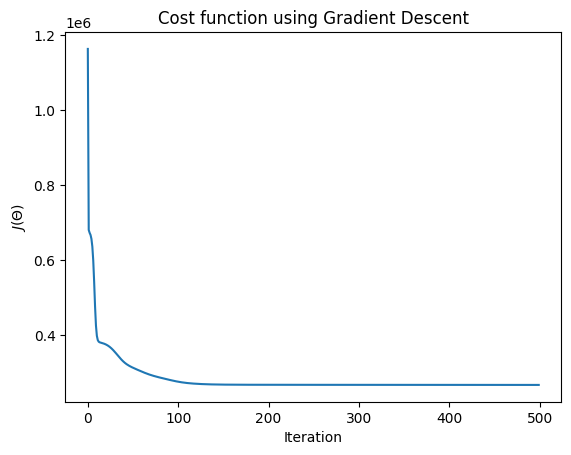

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [ ]:
p = np.dot(x_up, theta_up.T)

In [ ]:
p

array([[-1.69886936e-02,  4.16937659e+00,  1.80609758e+00, ...,
         1.90958850e+00,  1.34054052e+00,  1.78212340e+00],
       [ 1.46454207e-01,  2.01208644e+00, -1.68774265e-01, ...,
        -2.42170568e-05,  1.75672491e-01,  1.94486525e+00],
       [ 3.02967027e-02,  1.24728553e+00,  1.22482007e-01, ...,
         2.93762283e-01, -3.60083029e-01,  9.50288229e-01],
       ...,
       [ 6.72417898e-04, -7.83723160e-03,  1.00067361e-02, ...,
        -7.02278184e-04,  1.37308040e-02, -8.88741353e-03],
       [ 1.91697825e-03,  1.85472637e-02, -2.60599390e-04, ...,
        -3.05952609e-03,  3.41545145e-03,  2.54788055e-02],
       [ 2.83340331e-03,  5.34199571e-02,  9.46578758e-04, ...,
        -3.91988014e-03, -2.56989912e-02,  2.91358447e-02]])

In [ ]:
p.shape

(1682, 944)

In [ ]:
p[:, 0]+ ymean

array([3.86132989, 3.35256108, 3.06363004, ..., 2.00067242, 3.00191698,
       3.0028334 ])

In [ ]:
my_predictions = p[:, 0] + ymean

In [ ]:
my_predictions

array([3.86132989, 3.35256108, 3.06363004, ..., 2.00067242, 3.00191698,
       3.0028334 ])

In [ ]:
my_predictions = pd.DataFrame(my_predictions)

In [ ]:
df = pd.DataFrame(np.hstack((my_predictions,np.array(movies)[:,np.newaxis])))
df.head()

,0,1
0,3.861329890461623,1 Toy Story (1995)
1,3.352561077229323,2 GoldenEye (1995)
2,3.0636300360778974,3 Four Rooms (1995)
3,3.7432131936300364,4 Get Shorty (1995)
4,3.2785784381934313,5 Copycat (1995)


In [ ]:
df.sort_values(by=[0],ascending=False,inplace=True)
df.head(10)

,0,1
1188,5.011622905527545,1189 Prefontaine (1997)
1499,5.0115935743876046,1500 Santa with Muscles (1996)
813,5.010960899307406,"814 Great Day in Harlem, A (1994)"
1200,5.007610039055958,1201 Marlene Dietrich: Shadow and Light (1996)
1292,5.002170533886962,1293 Star Kid (1997)
1535,5.001998167116504,1536 Aiqing wansui (1994)
1652,5.001805023336986,1653 Entertaining Angels: The Dorothy Day Stor...
1598,4.999485097765349,1599 Someone Else's America (1995)
1121,4.998896022754536,1122 They Made Me a Criminal (1939)
1466,4.998714790839934,"1467 Saint of Fort Washington, The (1993)"
